# Preprocessing

## Load libraries and data




In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Life Expectancy Data.csv")
df.head()
# lets assume we are predicting life expectancy using other variables

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Sanity check
- head, shape, size, info(), describe()
- check for null
- sum of null
- sum of sum of null



In [9]:
print(df.isnull().sum().sum())
print(df.size)
print(df.isnull().sum())
print(df.shape)


2564
64658
Country                              1
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
(2939, 22)


In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2939 non-null   int64  
 2   Status                           2939 non-null   object 
 3   Life expectancy                  2929 non-null   float64
 4   Adult Mortality                  2929 non-null   float64
 5   infant deaths                    2939 non-null   int64  
 6   Alcohol                          2745 non-null   float64
 7   percentage expenditure           2939 non-null   float64
 8   Hepatitis B                      2386 non-null   float64
 9   Measles                          2939 non-null   int64  
 10   BMI                             2905 non-null   float64
 11  under-five deaths                2939 non-null   int64  
 12  Polio               

In [11]:
print(df.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2939.000000       2929.000000      2929.000000    2939.000000   
mean   2007.516162         69.217002       164.967224      30.301803   
std       4.615140          9.531906       124.614075     117.906488   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2745.000000             2939.000000  2386.000000    2939.000000   
mean      4.601796              738.000104    80.939648    2419.273562   
std       4.052058             1987.623168    25.064791   11465.333795   
min       0.010000                0.000000     1.000000

In [12]:
# Missing value percentage
df.isnull().sum()/df.shape[0] *100  # if found more than 50% we can delete the column

Country                             0.034025
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340252
Adult Mortality                     0.340252
infant deaths                       0.000000
Alcohol                             6.600885
percentage expenditure              0.000000
Hepatitis B                        18.815924
Measles                             0.000000
 BMI                                1.156856
under-five deaths                   0.000000
Polio                               0.646478
Total expenditure                   7.689690
Diphtheria                          0.646478
 HIV/AIDS                           0.000000
GDP                                15.243280
Population                         22.184416
 thinness  1-19 years               1.156856
 thinness 5-9 years                 1.156856
Income composition of resources     5.682205
Schooling                           5.546104
dtype: flo

In [13]:
# Checking for duplicates
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
2934    False
2935    False
2936    False
2937    False
2938     True
Length: 2939, dtype: bool
1


In [14]:
# Checking for garbage values: nore if garbage value is present its alway present at object data type
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("*" * 30)
        


Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
******************************
Status
Developing    2427
Developed      512
Name: count, dtype: int64
******************************


## EDA



In [15]:
# histograms for numerical values: looking at distribution
# import warnings
# warnings.filterwarnings("ignore")
# print(df.select_dtypes(include="number").columns.size)
# for i in df.select_dtypes(include="number").columns:
#     sns.histplot(df[i])
#     plt.show()

In [16]:
# Boxplot to identify outliers
# import warnings
# warnings.filterwarnings("ignore")
# print(df.select_dtypes(include="number").columns.size)
# for i in df.select_dtypes(include="number").columns:
#     sns.boxplot(data=df, x=i)
#     plt.show()

In [17]:
# Scatterplot to uderstand the relationship
# for i in df.select_dtypes(include="number").columns:
#     plt.figure(figsize=(6,6))
#     sns.scatterplot(data=df, x="Life expectancy ", y=i)
#     plt.show()

In [18]:
# Correlation/heatmap to understand the relation
s = df.select_dtypes(include="number").corr()
s

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.171137,-0.081027,-0.037368,-0.052533,0.031591,0.104316,-0.082410,0.109275,-0.042907,0.094223,0.090414,0.134377,-0.142606,0.101879,0.016966,-0.048620,-0.051675,0.243854,0.209667
Life expectancy,0.171137,1.000000,-0.697076,-0.196313,0.405045,0.381777,0.256420,-0.157357,0.567603,-0.222287,0.465236,0.217414,0.479151,-0.556454,0.461363,-0.021504,-0.477706,-0.472121,0.724678,0.751665
Adult Mortality,-0.081027,-0.697076,1.000000,0.078465,-0.196316,-0.242695,-0.161997,0.030978,-0.386788,0.093860,-0.274322,-0.114243,-0.274614,0.527593,-0.295872,-0.013618,0.303888,0.309436,-0.457533,-0.454181
infant deaths,-0.037368,-0.196313,0.078465,1.000000,-0.115612,-0.085603,-0.223565,0.501129,-0.227251,0.996629,-0.170684,-0.128621,-0.175167,0.024798,-0.108411,0.556801,0.465530,0.471165,-0.145102,-0.193694
Alcohol,-0.052533,0.405045,-0.196316,-0.115612,1.000000,0.341345,0.087562,-0.051799,0.330520,-0.112354,0.221763,0.296775,0.222045,-0.050355,0.354804,-0.035244,-0.428971,-0.417595,0.450174,0.547461
percentage expenditure,0.031591,0.381777,-0.242695,-0.085603,0.341345,1.000000,0.016285,-0.056584,0.228760,-0.087848,0.147280,0.174341,0.143643,-0.097775,0.899380,-0.025660,-0.251458,-0.252993,0.382011,0.389737
Hepatitis B,0.104316,0.256420,-0.161997,-0.223565,0.087562,0.016285,1.000000,-0.120528,0.150387,-0.233126,0.486170,0.058261,0.611491,-0.111386,0.083915,-0.123321,-0.120424,-0.124952,0.199530,0.231107
Measles,-0.082410,-0.157357,0.030978,0.501129,-0.051799,-0.056584,-0.120528,1.000000,-0.175946,0.507809,-0.136159,-0.106251,-0.141876,0.030323,-0.076447,0.265966,0.224694,0.220957,-0.129526,-0.137198
BMI,0.109275,0.567603,-0.386788,-0.227251,0.330520,0.228760,0.150387,-0.175946,1.000000,-0.237648,0.284591,0.242365,0.283167,-0.242720,0.301645,-0.072293,-0.532116,-0.538999,0.508877,0.547037
under-five deaths,-0.042907,-0.222287,0.093860,0.996629,-0.112354,-0.087848,-0.233126,0.507809,-0.237648,1.000000,-0.188718,-0.130147,-0.195666,0.037579,-0.112071,0.544423,0.467624,0.472094,-0.163277,-0.209355


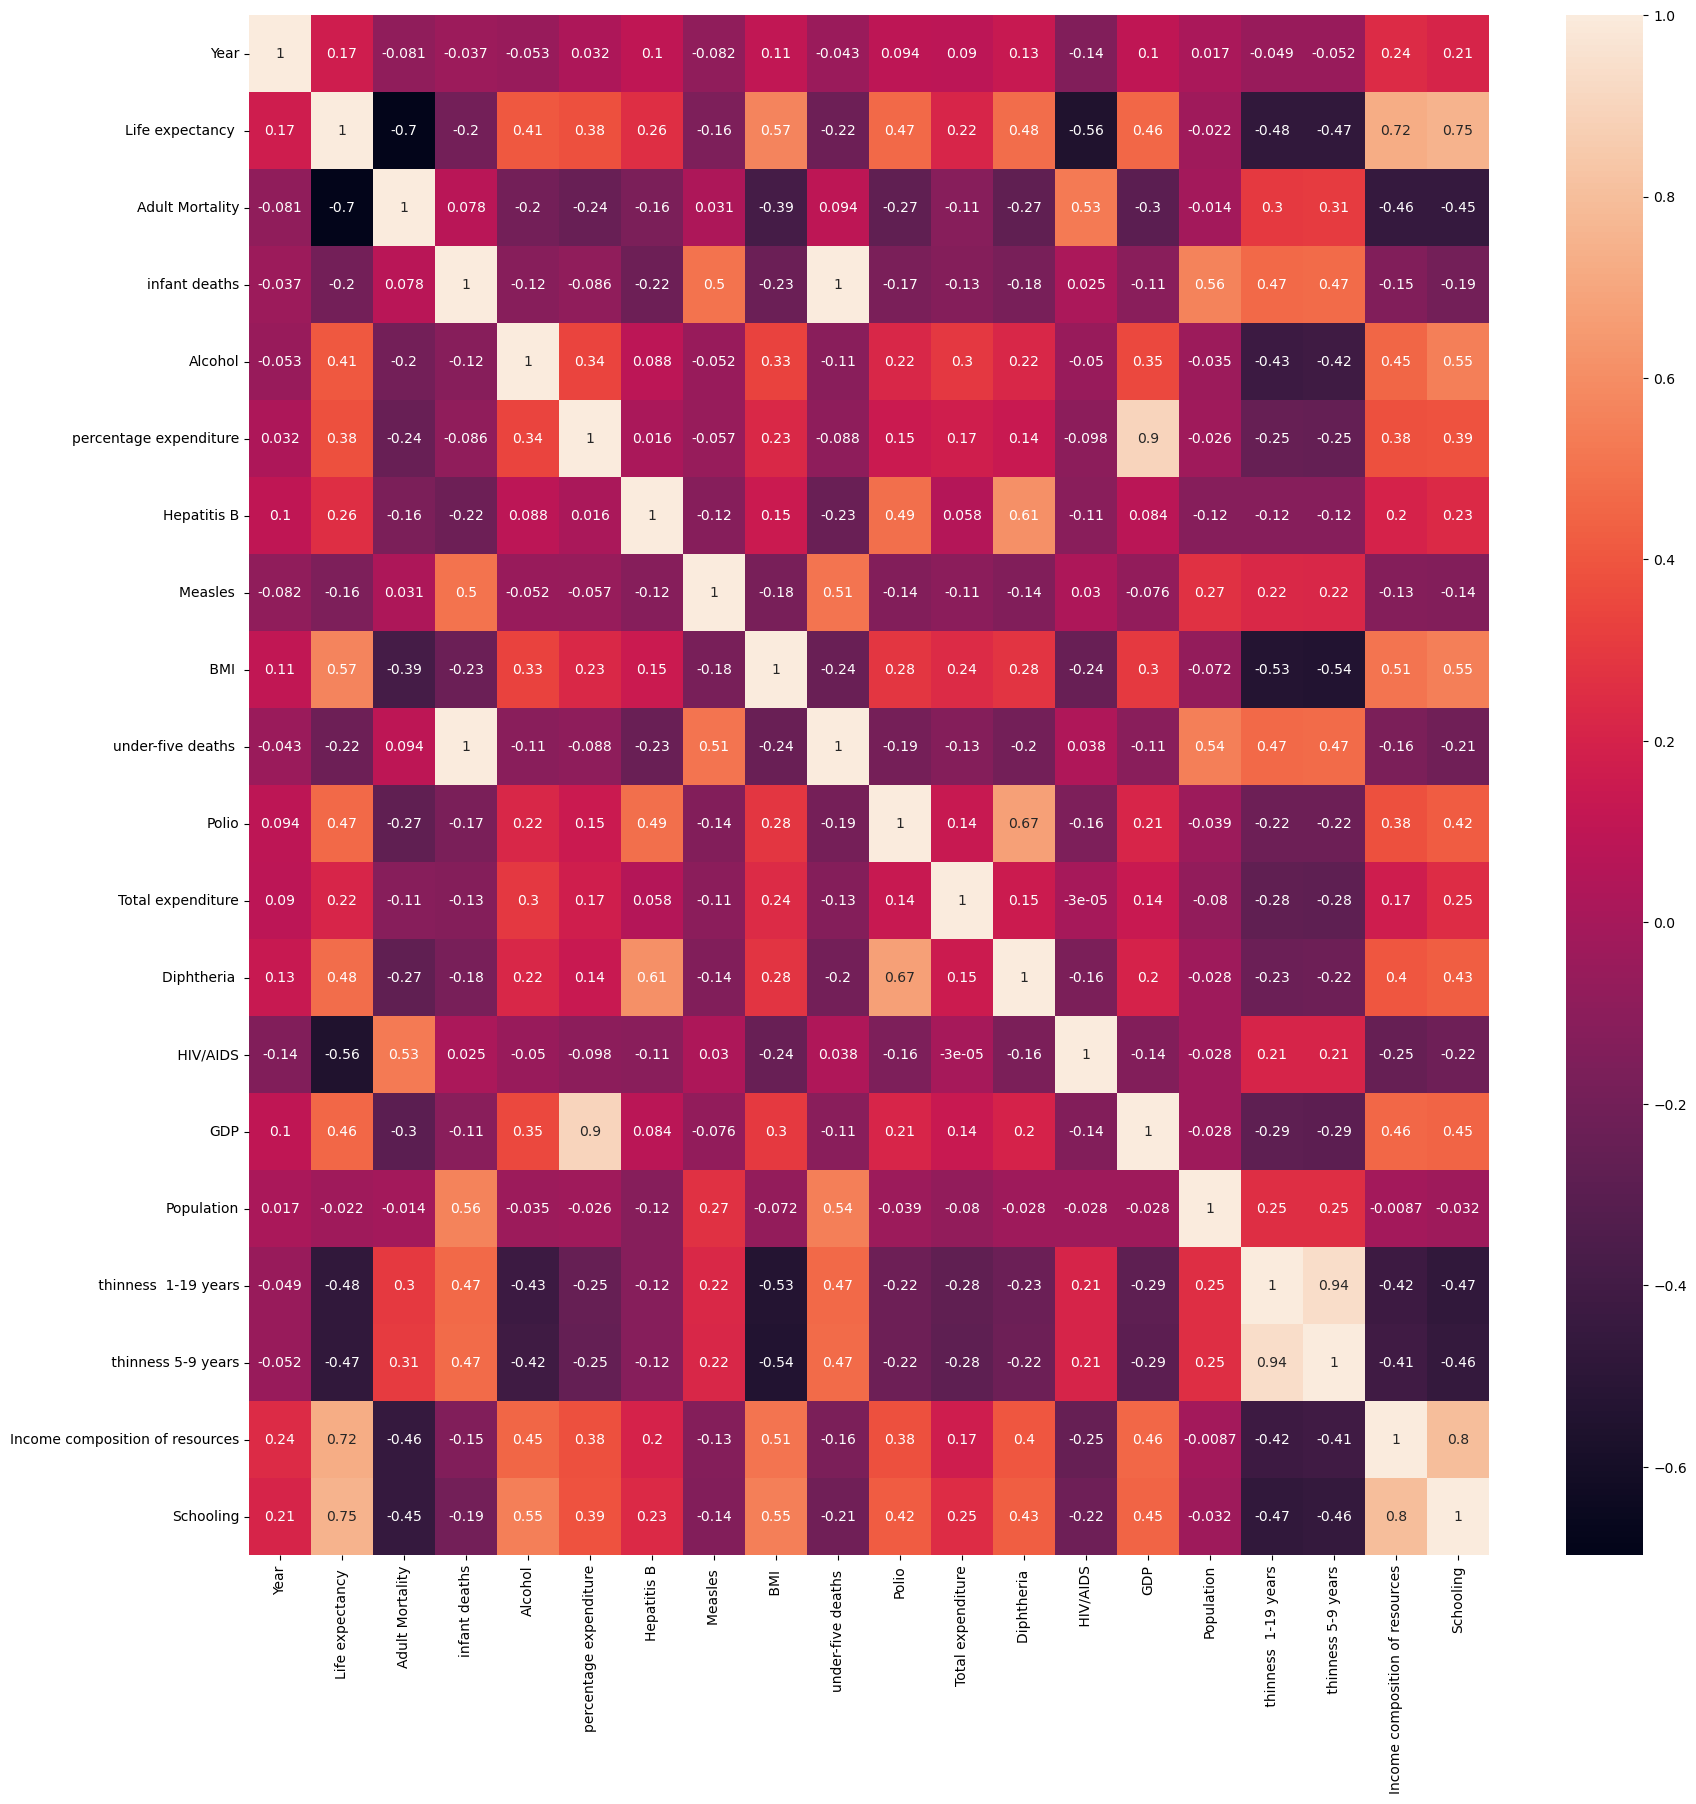

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(s, annot=True)
plt.show()

## Handling missing values



In [20]:
# choose method to fill missing value (0, mean, median, mode, or KNN Imputer)
# contineus value could be filled up with median or mode
# discret, categorical value can be filled with mode
df.isnull().sum()

# we will not fillup average for life expectancy as its our target variable. for the rest we will fill up

Country                              1
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [21]:
# Dropping rows (axis = 0 default) and columns (axis=1)
# new_df = df.dropna(axis = 0, how ='any') # if any field is nan
# new_df = df.dropna(axis = 0, how ='all') # if all fields are nan
# new_df

In [22]:
# lets start with numeric variables with mean 

for i in [" BMI ", "Polio", "Income composition of resources"]:
    df[i].fillna(df[i].mean(), inplace=True) # here we can also pass direct value such as 0
print(df.isnull().sum())

Country                              1
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources      0
Schooling                          163
dtype: int64


In [23]:
# Filling categorical columns
# df.tail()
df["Country"].fillna(df["Country"].mode()[0], inplace=True)
df.tail()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Afghanistan,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8
2938,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [24]:
    # Imputing missing values with average of nearest values
    from sklearn.impute import KNNImputer
    impute = KNNImputer() #n_neighbour argument can be passed as argument

    # imputing in all missing columns
    for i in df.select_dtypes(include="number").columns:
        df[i] = impute.fit_transform(df[[i]])
    df.isnull().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Handling Outliers



In [25]:
# decide whether to handle outliers or not. If yes how? Its done only for numeric variable
# we can treat outlier if not less and not more data are out of scope. if there are a lot of data we may not
# we can cap outliers between upper to lower scale of box plot

# define function to find lower and upper limit
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    return lw, uw

wisker(df["GDP"])



(-9771.612438498576, 17831.566064164293)

In [26]:
# for i in ["GDP", "Total expenditure", ' thinness  1-19 years', ' thinness 5-9 years']:
#     sns.boxplot(df[i])
#     plt.show()

In [27]:
df.columns
for i in ["GDP", "Total expenditure", ' thinness  1-19 years', ' thinness 5-9 years']:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i]<lw, lw, df[i])
    df[i] = np.where(df[i]>uw, uw, df[i])

In [28]:
# for i in ["GDP", "Total expenditure", ' thinness  1-19 years', ' thinness 5-9 years']:
#     sns.boxplot(df[i])
#     plt.show()

## Handling duplicate values



In [29]:
df.duplicated()
df.drop_duplicates(inplace=True)

In [30]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.0,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.0,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.0,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Afghanistan,2001.0,Developing,45.3,686.0,25.0,1.72,0.0,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000.0,Developing,46.0,665.0,24.0,1.68,0.0,79.0,1483.0,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


## Handling garbage values



In [31]:
# we donot have garbage value, if had we filled that with mode
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Encoding of data. Conversion from categorical to numerical



In [32]:
# label encoding and one hot encoding
dummy_df = pd.get_dummies(data=df, columns=["Country", "Status"], drop_first=True) # drop original column to create new for each categories